# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# IMPORTING DATASET

In [2]:
dataset= pd.read_csv("household_power_consumption.csv",sep=";" )

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dataset

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0,240.43,4,0,0,0.0
2075255,26/11/2010,20:59:00,0.944,0,240,4,0,0,0.0
2075256,26/11/2010,21:00:00,0.938,0,239.82,3.8,0,0,0.0
2075257,26/11/2010,21:01:00,0.934,0,239.7,3.8,0,0,0.0


In [4]:
dataset['Global_active_power']=pd.to_numeric(dataset['Global_active_power'],errors='coerce')

In [5]:
dataset['Global_reactive_power']=pd.to_numeric(dataset['Global_reactive_power'],errors='coerce')

In [6]:
dataset['Voltage']=pd.to_numeric(dataset['Voltage'],errors='coerce')

In [7]:
dataset['Global_intensity']=pd.to_numeric(dataset['Global_intensity'],errors='coerce')

In [8]:
dataset['Sub_metering_1']=pd.to_numeric(dataset['Sub_metering_1'],errors='coerce')

In [9]:
dataset['Sub_metering_2']=pd.to_numeric(dataset['Sub_metering_2'],errors='coerce')

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


# TAKING CARE OF MISSING DATA

In [11]:
dataset.isnull().any()

Date                     False
Time                     False
Global_active_power       True
Global_reactive_power     True
Voltage                   True
Global_intensity          True
Sub_metering_1            True
Sub_metering_2            True
Sub_metering_3            True
dtype: bool

In [12]:
dataset['Global_active_power'].fillna((dataset['Global_active_power'].mean()),inplace=True)

In [13]:
dataset['Global_reactive_power'].fillna((dataset['Global_reactive_power'].mean()),inplace=True)

In [14]:
dataset['Voltage'].fillna((dataset['Voltage'].mean()),inplace=True)

In [15]:
dataset['Global_intensity'].fillna((dataset['Global_intensity'].mean()),inplace=True)

In [16]:
dataset['Sub_metering_1'].fillna((dataset['Sub_metering_1'].mean()),inplace=True)

In [17]:
dataset['Sub_metering_2'].fillna((dataset['Sub_metering_2'].mean()),inplace=True)

In [18]:
dataset['Sub_metering_3'].fillna((dataset['Sub_metering_3'].mean()),inplace=True)
#since Sub_metering_3 is not a categorical coloumn we use mean to fill the missing values

In [19]:
dataset.isnull().any()
#now we see that there are no missing values, hence the missing data is taken care of.

Date                     False
Time                     False
Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3           False
dtype: bool

In [20]:
x=dataset.iloc[:,3:].values
x

array([[  0.418, 234.84 ,  18.4  ,   0.   ,   1.   ,  17.   ],
       [  0.436, 233.63 ,  23.   ,   0.   ,   1.   ,  16.   ],
       [  0.498, 233.29 ,  23.   ,   0.   ,   2.   ,  17.   ],
       ...,
       [  0.   , 239.82 ,   3.8  ,   0.   ,   0.   ,   0.   ],
       [  0.   , 239.7  ,   3.8  ,   0.   ,   0.   ,   0.   ],
       [  0.   , 239.55 ,   3.8  ,   0.   ,   0.   ,   0.   ]])

In [21]:
y=dataset.iloc[:,2].values
y

array([4.216, 5.36 , 5.374, ..., 0.938, 0.934, 0.932])

# DATA VISUALISATION

In [22]:
dataset.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


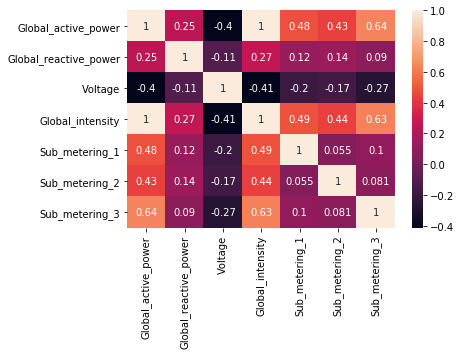

In [23]:
import seaborn as sns
sns.heatmap(dataset.corr(),annot=True)

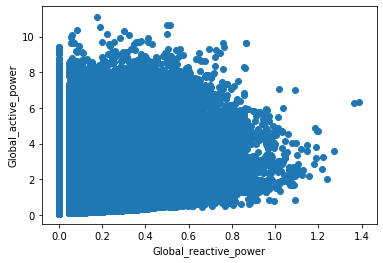

In [24]:
plt.scatter(x[:,0],y)
plt.xlabel('Global_reactive_power')
plt.ylabel('Global_active_power')
plt.show()

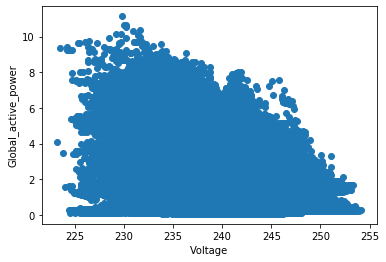

In [25]:
plt.scatter(x[:,1],y)
plt.xlabel('Voltage')
plt.ylabel('Global_active_power')
plt.show()

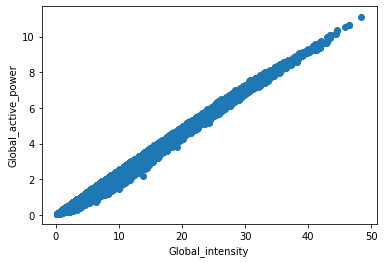

In [26]:
plt.scatter(x[:,2],y)
plt.xlabel('Global_intensity')
plt.ylabel('Global_active_power')
plt.show()

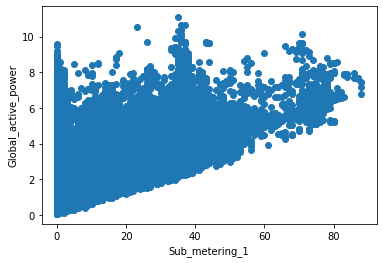

In [27]:
plt.scatter(x[:,3],y)
plt.xlabel('Sub_metering_1')
plt.ylabel('Global_active_power')
plt.show()

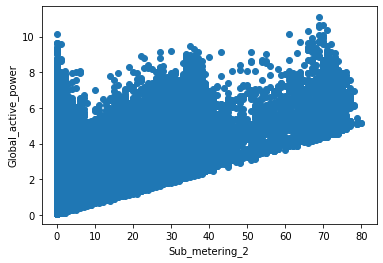

In [28]:
plt.scatter(x[:,4],y)
plt.xlabel('Sub_metering_2')
plt.ylabel('Global_active_power')
plt.show()

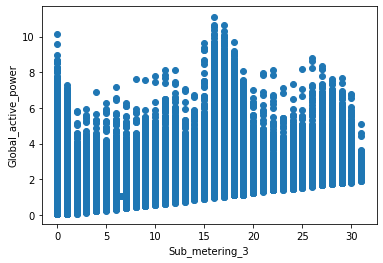

In [29]:
plt.scatter(x[:,5],y)
plt.xlabel('Sub_metering_3')
plt.ylabel('Global_active_power')
plt.show()

# FEATURE SCALING

In [30]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x=sc.fit_transform(x)
x

array([[ 2.62721673, -1.86351698,  3.11836853, -0.18348885, -0.05159823,
         1.25731535],
       [ 2.78791067, -2.23933513,  4.15991983, -0.18348885, -0.05159823,
         1.13804304],
       [ 3.34141203, -2.34493693,  4.15991983, -0.18348885,  0.1212486 ,
         1.25731535],
       ...,
       [-1.10445372, -0.31676127, -0.18742474, -0.18348885, -0.22444507,
        -0.77031395],
       [-1.10445372, -0.35403249, -0.18742474, -0.18348885, -0.22444507,
        -0.77031395],
       [-1.10445372, -0.40062152, -0.18742474, -0.18348885, -0.22444507,
        -0.77031395]])

In [31]:
from joblib import dump
dump(sc,"power.save")

['power.save']

# SPLITTING DATA INTO TRAIN AND TEST

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [34]:
x_test

array([[-1.10445372, -1.30755459,  1.94096271, -0.01994037, -0.22444507,
         1.25731535],
       [ 1.09169683, -0.40062152,  1.03526592, -0.18348885, -0.05159823,
         1.37658766],
       [-0.4081133 ,  0.45040471, -0.41384893, -0.18348885, -0.22444507,
        -0.77031395],
       ...,
       [-0.60451701,  0.52494715, -0.77612765, -0.18348885, -0.22444507,
        -0.77031395],
       [ 0.75245406, -1.13672815,  1.75982335, -0.18348885, -0.22444507,
         1.37658766],
       [ 1.64519819, -1.28891897,  1.26169012, -0.18348885, -0.05159823,
         1.37658766]])

In [35]:
y_test

array([3.112, 2.21 , 0.666, ..., 0.31 , 2.934, 2.412])

# TRAINING AND TESTING THE MODEL

In [36]:
from sklearn.ensemble import RandomForestRegressor
Rf=RandomForestRegressor(n_estimators=10,random_state=0,n_jobs=-1)
Rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [37]:
import pickle
pickle.dump(Rf,open('power.pkl','wb'))

In [38]:
y_pred=Rf.predict(x_test)
y_pred

array([3.1314 , 2.1952 , 0.6722 , ..., 0.27626, 2.9348 , 2.3826 ])

In [39]:
y_test

array([3.112, 2.21 , 0.666, ..., 0.31 , 2.934, 2.412])

In [40]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9989774580980002